In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = r"../data/RawData.xlsx"

In [3]:
raw = pd.read_excel(data_dir,sheet_name="HangSeng Index Data")

In [4]:
raw.head()

,Ntime,Time,Closing Price,Open Price,High price,Low Price,Volume,MACD,CCI,ATR,...,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,HIBOR
0,20080702,733591,21704.4492,21785.3906,21938.1992,21555.5293,254858.26,-646.053200,-193.115118,546.4805,...,22956.709411,22497.96286,-751.5703,22187.92768,-887.8516,-5.754486,-0.069509,-401619.369837,71.99,1.6
1,20080703,733592,21242.7793,21389.4902,21742.0703,21163.5703,272528.48,-702.282620,-186.955957,578.5000,...,22793.477972,22289.66071,-1392.3806,21909.45156,-1786.9102,-7.872373,-0.068201,-507305.257079,72.73,1.6
2,20080704,733593,21423.8203,21402.1699,21534.0508,21344.8496,179634.42,-723.891770,-133.742667,291.2715,...,22663.034384,22152.28180,-1031.8496,21703.08164,-1634.1699,-8.153977,-0.058111,-398848.614015,72.71,1.6
3,20080707,733596,21913.0605,21402.6992,21916.2109,21402.6992,196457.92,-693.544830,-77.445777,513.5117,...,22591.608300,22069.02789,-129.2891,21677.22382,-1412.7403,-3.880007,-0.035303,-264228.169678,72.71,1.6
4,20080708,733597,21220.8105,21632.6992,21684.2109,21098.8398,201519.68,-717.087314,-108.634123,814.2207,...,22461.056128,21919.61285,-881.1993,21500.98396,-1576.7989,-6.703666,-0.055006,-518512.844172,72.96,1.6


### Wavelet transform
two level wavelet transformation with harr function applied twice

In [5]:
import pywt
from pywt import wavedec, waverec
from statsmodels.robust import mad

def waveletSmooth( x, wavelet="haar", level=2, declevel=2):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode='periodization',level=declevel,axis=0 )
    # calculate a threshold
    sigma = mad(coeff[-level])
    #print("sigma: ",sigma)
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="hard" ) for i in coeff[1:] )
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec( coeff, wavelet, mode='periodization',axis=0 )
   
    return y
    #return y,sigma,uthresh

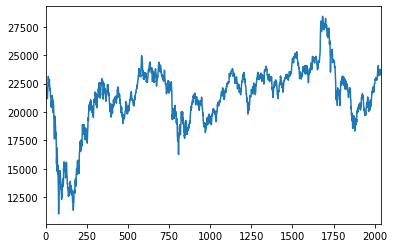

In [6]:
raw['Closing Price'].plot()

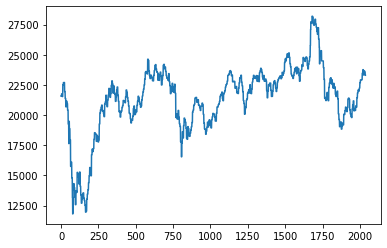

In [7]:
smooth = waveletSmooth(raw['Closing Price'])
plt.plot(smooth)

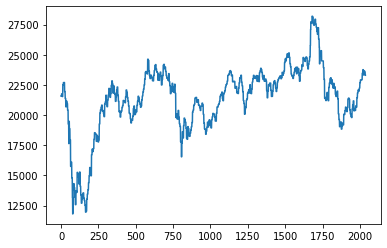

In [8]:
smooth2 = waveletSmooth(smooth)
plt.plot(smooth)

In [12]:
raw.head().apply(waveletSmooth, axis=0).apply(waveletSmooth, axis=0)

,Ntime,Time,Closing Price,Open Price,High price,Low Price,Volume,MACD,CCI,ATR,...,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,HIBOR
0,20080704.0,733593.0,21801.862275,21692.887675,21782.63280,21562.6416,225869.77,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.2724,21869.421175,-980.8887,-5.356268,-0.057781,-393000.352652,72.165,1.6
1,20080704.0,733593.0,21340.192375,21296.987275,21782.63280,21170.6826,225869.77,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.2724,21869.421175,-1879.9473,-7.474154,-0.057781,-393000.352652,72.905,1.6
2,20080704.0,733593.0,21326.407225,21494.937475,21591.55275,21337.7373,225869.77,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.2724,21869.421175,-1430.4180,-8.552196,-0.057781,-393000.352652,72.535,1.6
3,20080704.0,733593.0,21815.647425,21494.937475,21973.71285,21395.5869,225869.77,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.2724,21869.421175,-1430.4180,-4.278226,-0.057781,-393000.352652,72.535,1.6
4,20080708.0,733597.0,21220.810500,21632.699200,21684.21090,21098.8398,201519.68,-717.087314,-108.634123,814.220700,...,22461.056128,21919.612850,-881.1993,21500.983960,-1576.7989,-6.703666,-0.055006,-518512.844172,72.960,1.6
5,20080708.0,733597.0,21220.810500,21632.699200,21684.21090,21098.8398,201519.68,-717.087314,-108.634123,814.220700,...,22461.056128,21919.612850,-881.1993,21500.983960,-1576.7989,-6.703666,-0.055006,-518512.844172,72.960,1.6


In [13]:
data = raw.apply(waveletSmooth, axis=0).apply(waveletSmooth, axis=0)

In [14]:
data

,Ntime,Time,Closing Price,Open Price,High price,Low Price,Volume,MACD,CCI,ATR,...,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,HIBOR
0,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.60
1,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.60
2,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.60
3,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.60
4,20080709.5,733598.5,21758.237775,21692.567375,21971.105475,21472.679675,234556.975,-654.598880,-46.457574,633.428250,...,22382.993209,21823.400168,-29.57425,21612.124680,-920.309575,-3.880303,-0.028366,-251533.682437,72.4875,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,20160927.5,736600.5,23562.235000,23548.797500,23664.445000,23387.402500,164989.815,215.596600,-9.939365,307.787500,...,23415.814661,23509.812750,76.77250,23593.106500,-200.627500,-1.359532,0.012864,242033.939874,95.4233,0.16
2034,20160927.5,736600.5,23562.235000,23548.797500,23664.445000,23387.402500,164989.815,215.596600,-9.939365,307.787500,...,23415.814661,23509.812750,76.77250,23593.106500,-200.627500,-1.359532,0.012864,242033.939874,95.4233,0.16
2035,20160927.5,736600.5,23562.235000,23548.797500,23664.445000,23387.402500,164989.815,215.596600,-9.939365,307.787500,...,23415.814661,23509.812750,76.77250,23593.106500,-200.627500,-1.359532,0.012864,242033.939874,95.4233,0.16
2036,20160930.0,736603.0,23297.150000,23435.290000,23484.370000,23239.360000,167484.270,173.747805,-78.490429,500.110000,...,23438.355631,23574.358000,-462.65000,23509.218000,81.390000,0.028123,-0.010756,130773.724754,95.4426,0.16


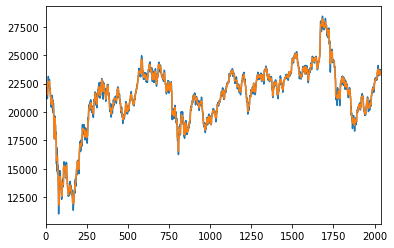

In [16]:
# 两次小波变换之后确实平滑很多
raw['Closing Price'].plot()
data['Closing Price'].plot()

In [27]:
data.head()

,Unnamed: 0,Ntime,Time,Closing Price,Open Price,High price,Low Price,Volume,MACD,CCI,...,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,HIBOR
0,0,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.6
1,1,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.6
2,2,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.6
3,3,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.6
4,4,20080709.5,733598.5,21758.237775,21692.567375,21971.105475,21472.679675,234556.975,-654.598880,-46.457574,...,22382.993209,21823.400168,-29.57425,21612.124680,-920.309575,-3.880303,-0.028366,-251533.682437,72.4875,1.6


In [47]:
#data.to_csv('test.csv')
data = pd.read_csv('test.csv', index_col=0)
X_train = data.drop(columns=['Ntime','Time'], axis=1).values

In [48]:
X_train.shape

(2038, 19)

### Stacked Auto Encoder

In [38]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [57]:
n_inputs = 19
n_hidden = 10
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 1e-3

n_epochs = 10
batch_size = 128
num_train = X_train.shape[0]
n_batches = int(num_train  / batch_size)

sparsity_target = 0.1
sparsity_weight = 0.2

In [74]:
def kl_divergence(p, q):
    return p* tf.log(p/q)+(1-p)*tf.log((1-p)/(1-q))

In [72]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
with tf.contrib.framework.arg_scope(
    [fully_connected],
    activation_fn=tf.nn.relu,
    weights_initializer=tf.contrib.layers.variance_scaling_initializer(),
    weights_regularizer=tf.contrib.layers.l2_regularizer(l2_reg)):
    
    hidden1 = fully_connected(X, n_hidden)
    hidden2 = fully_connected(hidden1, n_hidden)
    hidden3 = fully_connected(hidden2, n_hidden)
    hidden4 = fully_connected(hidden3, n_hidden)
    outputs = fully_connected(hidden4, n_outputs, activation_fn=None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
reg_loss = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_loss)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [73]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        total_loss=0
        for i in range(n_batches):
            sample_idxs = np.random.choice(num_train, batch_size)
            X_batch = X_train[sample_idxs,:]
            _,loss_batch = sess.run([optimizer, loss], feed_dict = {X:X_batch})
            total_loss+=loss_batch
        print('{}/{} Average loss per epoch: {}'.format(epoch, n_epochs, total_loss/n_batches))

0/10 Average loss per epoch: 51272796228.26667
1/10 Average loss per epoch: 16345214634.666666
2/10 Average loss per epoch: 11500042990.933332
3/10 Average loss per epoch: 5335896985.6
4/10 Average loss per epoch: 1962494058.6666667
5/10 Average loss per epoch: 773088736.0
6/10 Average loss per epoch: 483984390.4
7/10 Average loss per epoch: 419156868.26666665
8/10 Average loss per epoch: 315215430.4
9/10 Average loss per epoch: 301127249.06666666
